<a href="https://colab.research.google.com/github/kimkyeonghyun/AI_math_tutorial/blob/main/AiMath1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear algebra - Week1

1. Systems of linear equations
2. Singular and non-singular matrices
3. Determinants




In [9]:
# 필요한 패키지 불러오기
import numpy as np
import matplotlib.pyplot as plt
import torch
import sympy as sy

## 1. Systems of linear equations



### Linear equation

In [ ]:
t = np.linspace(0, 40, 1000) # start, finish, n points

강도가 도망간 거리: $d = 2.5t$

In [ ]:
d_r = 2.5 * t

경찰이 달려간 거리: $d = 3(t-5)$

In [ ]:
d_s = 3 * (t-5)

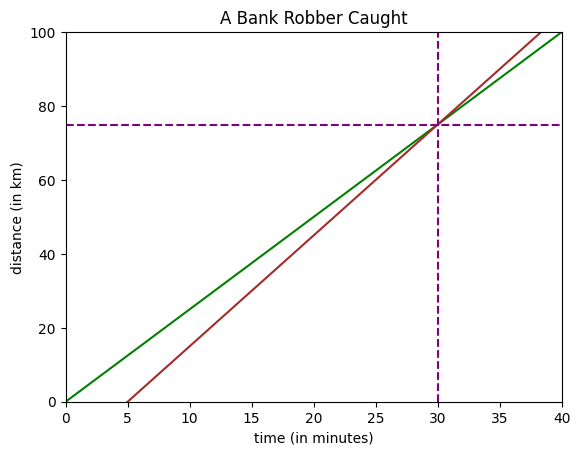

In [ ]:
# 그래프 그리기 설정
fig, ax = plt.subplots()  # 그래프를 그리기 위한 기본 설정
plt.title('A Bank Robber Caught')  # 그래프 제목 설정
plt.xlabel('time (in minutes)')  # x축 레이블 설정
plt.ylabel('distance (in km)')  # y축 레이블 설정
ax.set_xlim([0, 40])  # x축 범위 설정
ax.set_ylim([0, 100])  # y축 범위 설정
ax.plot(t, d_r, c='green')  # 첫 번째 데이터 플롯 (녹색)
ax.plot(t, d_s, c='brown')  # 두 번째 데이터 플롯 (갈색)
plt.axvline(x=30, color='purple', linestyle='--')  # 특정 x값에 수직선 추가
_ = plt.axhline(y=75, color='purple', linestyle='--')  # 특정 y값에 수평선 추가

### Non-Linear equation

물체를 위로 던졌을때 물체의 시간 당 높이 : $h=-t^{2}+20t$

In [ ]:
h=-t**2+20*t

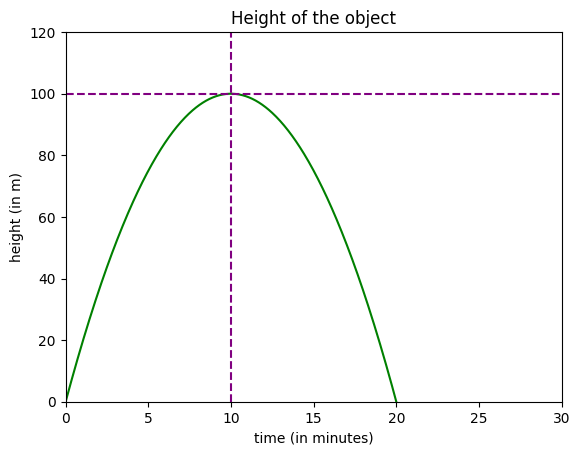

In [ ]:
# 그래프 그리기 설정
fig, ax = plt.subplots()  # 그래프를 그리기 위한 기본 설정
plt.title('Height of the object')  # 그래프 제목 설정
plt.xlabel('time (in minutes)')  # x축 레이블 설정
plt.ylabel('height (in m)')  # y축 레이블 설정
ax.set_xlim([0, 30])  # x축 범위 설정
ax.set_ylim([0, 120])  # y축 범위 설정
ax.plot(t, h, c='green')  # 데이터 플롯 (녹색)
plt.axvline(x=10, color='purple', linestyle='--')  # 특정 x값에 수직선 추가
_ = plt.axhline(y=100, color='purple', linestyle='--')  # 특정 y값에 수평선 추가


## 2. Singular and Non SIngular matrix & 3. Determinants

### Linear equations

Let's think about some examples about the system of linear equations

1. $a+b=5, a+2b=0$
2. $a+b=10, 2a+2b=20$
3. $a+b=10, 2a+2b=25$

In [ ]:
a=np.linspace(-40,40,1000)

In [ ]:
#1. equation
b_1=-a+5
b_2=-0.5*a

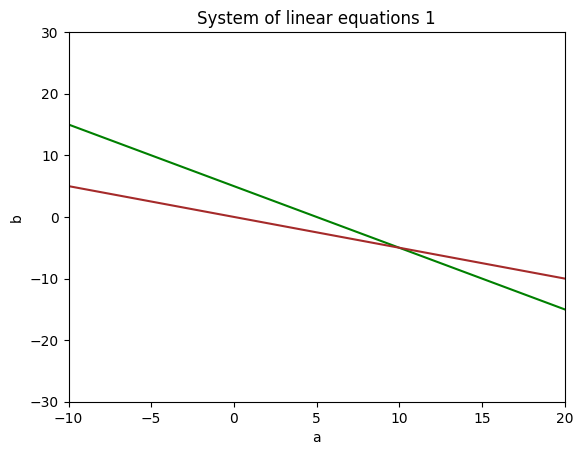

In [ ]:
fig, ax = plt.subplots()
plt.title('System of linear equations 1')
plt.xlabel('a')
plt.ylabel('b')
ax.set_xlim([-10, 20])
ax.set_ylim([-30, 30])
ax.plot(a, b_1, c='green')
ax.plot(a, b_2, c='brown')

In [ ]:
# equation 2

b_1=-a+10
b_2=-a+10

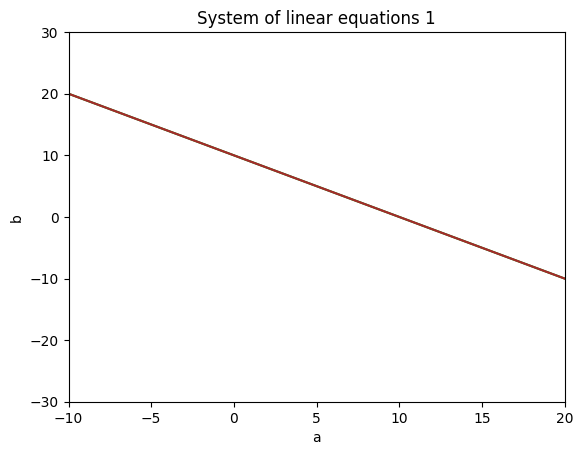

In [ ]:
fig, ax = plt.subplots()
plt.title('System of linear equations 1')
plt.xlabel('a')
plt.ylabel('b')
ax.set_xlim([-10, 20])
ax.set_ylim([-30, 30])
ax.plot(a, b_1, c='green')
ax.plot(a, b_2, c='brown')

In [ ]:
# equation 3

b_1=-a+10
b_2=-a+12.5

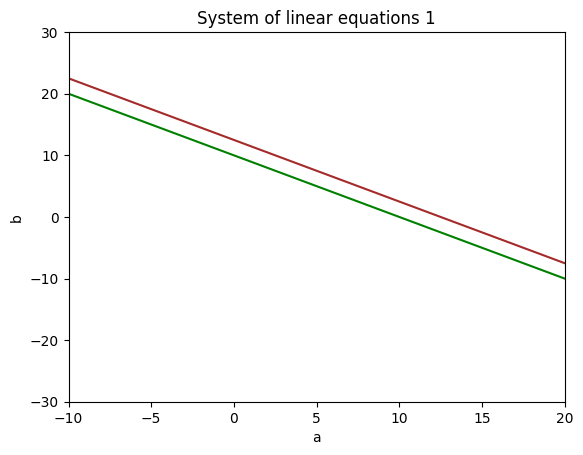

In [ ]:
fig, ax = plt.subplots()
plt.title('System of linear equations 1')
plt.xlabel('a')
plt.ylabel('b')
ax.set_xlim([-10, 20])
ax.set_ylim([-30, 30])
ax.plot(a, b_1, c='green')
ax.plot(a, b_2, c='brown')

### Equations as marix

Systems of equations as matrices

- The above systems can convert to matrices
- Before converting systems to matrixes, we need to understand scalar, vector, and matrix in python
- And then, There are some examples as matrices for singularity and non-singularity  



#### Scalars in python

In [ ]:
# In python
x=10
type(x)# if we'd like more specificity (e.g., int16, uint8), we need NumPy or another numeric library

int

In [ ]:
y=4
py_sum=x+y
py_sum

14

In [ ]:
x_float=10.0
py_sum=x_float+7
print("py_sum: ",py_sum)
print(type(py_sum))

py_sum:  17.0
<class 'float'>


In [ ]:
# Scalars in pytorch
x_pt=torch.tensor(10)  # type specification optional, e.g.: dtype=torch.float16
x_pt

tensor(10)

In [ ]:
x_pt.shape  # x_pt 텐서의 형태(차원)를 출력

torch.Size([])

#### Vectors in python

- vector
- vector in matrix
- Transpose
- zero vector

In [ ]:
x = np.array([25, 2, 5]) # type argument is optional, e.g.: dtype=np.float16
x

array([25,  2,  5])

In [ ]:
len(x) # x의 길이 출력

3

In [ ]:
x.shape

(3,)

In [ ]:
x[0] # zero-indexed

25

In [ ]:
type(x[0]) # x[0]의 형태 출력

numpy.int64

In [ ]:
# Transposing a regular 1-D array has no effect...
x_t = x.T
x_t

array([25,  2,  5])

In [ ]:
x_t.shape

(3,)

In [ ]:
# ...but it does we use nested "matrix-style" brackets: It has 1 rows and 3 column
y = np.array([[25, 2, 5]])
y

array([[25,  2,  5]])

In [ ]:
y.shape

(1, 3)

In [ ]:
# ...but can transpose a matrix with a dimension of length 1, which is mathematically equivalent:
y_t = y.T
y_t

array([[25],
       [ 2],
       [ 5]])

In [ ]:
y_t.shape # this is a column vector as it has 3 rows and 1 column

(3, 1)

In [ ]:
# Column vector can be transposed back to original row vector:
y_t.T

array([[25,  2,  5]])

In [ ]:
y_t.T.shape

(1, 3)

In [ ]:
# zero vector
z=np.zeros(3)
z

array([0., 0., 0.])

#### System of Linear Equations as Matrices

1. $a+b=0, 2a+b=0$
2. $a+b=0, 3a+3b=0$

In [ ]:
# 행렬 1 - 독립/유일 해/비특이 행렬 => 행렬식 ≠ 0
M1 = np.array([[1, 1], [2, 1]])  # 2x2 행렬을 numpy 배열로 생성
M1  # M1 값을 출력


array([[1, 1],
       [2, 1]])

In [ ]:
np.linalg.det(M1) # M1 행렬의 행렬식을 계산

-1.0

In [ ]:
b = np.array([0, 0])  # b 벡터를 numpy 배열로 생성
np.linalg.solve(M1, b)  # M1 행렬과 b 벡터를 사용하여 선형 방정식의 해를 계산


array([0., 0.])

In [ ]:
# 행렬 2 - 종속/중복/특이 행렬 => 행렬식 == 0

M2=np.array([[1,1],[3,3]])
M2

array([[1, 1],
       [3, 3]])

In [ ]:
np.linalg.det(M2)

0.0

In [ ]:
np.linalg.solve(M2, b)  # M2 행렬과 b 벡터를 사용하여 선형 방정식의 해를 계산 시도
# Singular matrix -> LinAlgError 발생 (M2가 특이 행렬이기 때문에 해를 구할 수 없음)


LinAlgError: Singular matrix

### The 3X3 Matrix

1. $a+b+c=10, a+2b+c=15, a+b+2c=12$
2. $a+b+c=10, a+b+2c=15, a+b+3c=20$
3. $a+b+c=10, 2a+2b+2c=20, 3a+3b+3c=30$

Cause Constants dont't matter for singularity
These matrices can convert below equations for determine singularity(the number of solutions)

1. $a+b+c=0, a+2b+c=0, a+b+2c=0$
2. $a+b+c=0, a+b+2c=0, a+b+3c=0$
3. $a+b+c=0, 2a+2b+2c=0, 3a+3b+3c=0$

In [ ]:
M1=np.array([[1,1,1,0],[1,2,1,1],[1,1,2,3]])
M2=np.array([[1,1,1],[1,1,2],[1,1,3]])
M3=np.array([[1,1,1],[2,2,2],[3,3,3]])

In [ ]:
np.linalg.det(M1)

LinAlgError: Last 2 dimensions of the array must be square

In [ ]:
print("determinant of system 1:", np.linalg.det(M1))
print("determinant of system 2:", np.linalg.det(M2))
print("determinant of system 3:", np.linalg.det(M3))

determinant of system 2: 0.0
determinant of system 3: 0.0


# Determinant as an area

In [ ]:
def plot_2ddet(matrix):
    # 행렬의 행렬식을 계산
    det = np.linalg.det(matrix)

    # 그림과 축 생성
    fig, ax = plt.subplots(figsize=(6, 6))

    # 벡터를 플롯
    ax.arrow(0, 0, matrix[0, 0], matrix[0, 1], head_width=0.1, head_length=0.1, color='b')  # 첫 번째 벡터 (파란색)
    ax.arrow(0, 0, matrix[1, 0], matrix[1, 1], head_width=0.1, head_length=0.1, color='r')  # 두 번째 벡터 (빨간색)
    ax.arrow(matrix[0, 0], matrix[0, 1], matrix[1, 0], matrix[1, 1], head_width=0.1, head_length=0.1, color='r')  # 빨간색 벡터의 끝에서 파란색 벡터의 끝으로
    ax.arrow(matrix[1, 0], matrix[1, 1], matrix[0, 0], matrix[0, 1], head_width=0.1, head_length=0.1, color='b')  # 파란색 벡터의 끝에서 빨간색 벡터의 끝으로

    # 행렬식 값을 주석으로 추가
    ax.annotate(f'determinant = {det:.2f}', (matrix[0, 0] / 2, matrix[0, 1] / 2))

    # 레이블 추가 및 그래프 표시
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.grid()
    plt.show()


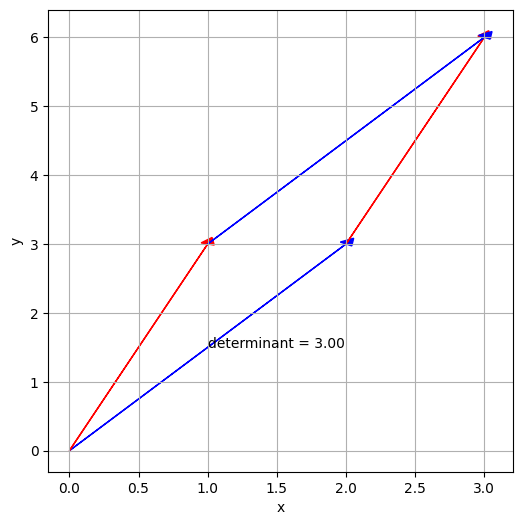

In [ ]:
matrix = np.array([[2, 3], [1, 3]])  # 2x2 행렬을 numpy 배열로 생성
plot_2ddet(matrix)  # 위에서 정의한 plot_2ddet 함수를 사용하여 행렬을 플롯


# Linear algebra - week 2

1. Solving systems of equations
2. Matrix row reduction
3. Row-reduced echelon form
4. Row echelon form
5. Rank of a matrix

## 1. Solvine systems of equations - 4. Row echelon form

- First, there is a **substitution** example.
  $$ y = 3x $$
$$ -5x + 2y = 2 $$

For  $y$:
$$ 2y = 2 + 5x $$
$$ y = \frac{2 + 5x}{2} = 1 + \frac{5x}{2} $$


In [ ]:
x = np.linspace(-10, 10, 1000) # start, finish, n points

In [ ]:
y1 = 3 * x

In [ ]:
y2 = 1 + (5*x)/2

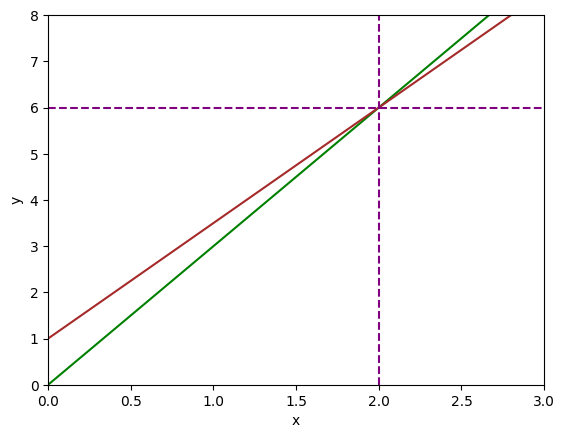

In [ ]:
fig, ax = plt.subplots()
plt.xlabel('x')
plt.ylabel('y')
ax.set_xlim([0, 3])
ax.set_ylim([0, 8])
ax.plot(x, y1, c='green')
ax.plot(x, y2, c='brown')
plt.axvline(x=2, color='purple', linestyle='--')
_ = plt.axhline(y=6, color='purple', linestyle='--')

- Second, there is a Elimination example.
$$ 2x - 3y = 15 $$
$$ 4x + 10y = 14 $$

For $y$.
$$ -3y = 15 - 2x $$
$$ y = \frac{15 - 2x}{-3} = -5 + \frac{2x}{3} $$

$$ 4x + 10y = 14 $$
$$ 2x + 5y = 7 $$
$$ 5y = 7 - 2x $$
$$ y = \frac{7 - 2x}{5} $$

In [ ]:
y1 = -5 + (2*x)/3

In [ ]:
y2 = (7-2*x)/5

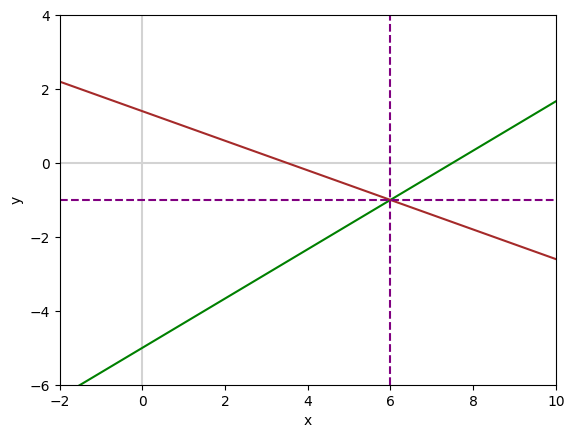

In [ ]:
fig, ax = plt.subplots()
plt.xlabel('x')
plt.ylabel('y')

# Add x and y axes:
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

ax.set_xlim([-2, 10])
ax.set_ylim([-6, 4])
ax.plot(x, y1, c='green')
ax.plot(x, y2, c='brown')
plt.axvline(x=6, color='purple', linestyle='--')
_ = plt.axhline(y=-1, color='purple', linestyle='--')

For Elimination Method, We can define 3 functions RowSwap, RowScale, RowAdd

Let's think About a system of 3 equations

$$ x_1-x_2+x_3=3$$
$$2x_1+x_2+8x_3=18$$
$$ 4x_1-2x_2-3x_3=-2$$

1. We could swap the first and last equation.
$$ 4x_1-2x_2-3x_3=-2$$
$$2x_1+x_2+8x_3=18$$
$$ x_1-x_2+x_3=3$$

2. Or, We could multiply the first equation by 5,
$$ 5x_1-5x_2+5x_3=15$$
$$2x_1+x_2+8x_3=18$$
$$ 4x_1-2x_2-3x_3=-2$$

3. Or, we could add 2 times the first equation to the last equation.
$$ x_1-x_2+x_3=3$$
$$2x_1+x_2+8x_3=18$$
$$ 6x_1-x_3=4$$

In [2]:
def RowSwap(A, k, l):
    # =============================================================================
    # A는 NumPy 배열입니다. RowSwap은 행 k와 l이 교환된 복제 배열을 반환합니다.
    # =============================================================================
    m = A.shape[0]  # m은 A의 행 수
    n = A.shape[1]  # n은 A의 열 수

    B = np.copy(A).astype('float')  # A의 복사본을 float형으로 생성

    for j in range(n):  # 각 열에 대해
        temp = B[k][j]  # 행 k의 열 j 값을 임시 변수에 저장
        B[k][j] = B[l][j]  # 행 k의 열 j 값을 행 l의 열 j 값으로 교체
        B[l][j] = temp  # 행 l의 열 j 값을 임시 변수의 값으로 교체

    return B  # 수정된 배열 반환


In [3]:
def RowScale(A, k, scale):
    # =============================================================================
    # A는 NumPy 배열입니다. RowScale은 행 k의 항목들이 scale로 곱해진 복제 배열을 반환합니다.
    # =============================================================================
    m = A.shape[0]  # m은 A의 행 수
    n = A.shape[1]  # n은 A의 열 수

    B = np.copy(A).astype('float')  # A의 복사본을 float형으로 생성

    for j in range(n):  # 각 열에 대해
        B[k][j] *= scale  # 행 k의 열 j 값을 scale로 곱함

    return B  # 수정된 배열 반환


In [4]:
def RowAdd(A, k, l, scale):
    # =============================================================================
    # A는 NumPy 배열입니다. RowAdd는 행 l이 수정된 복제 배열을 반환합니다.
    # 새로운 값은 행 l의 기존 값에 행 k의 값에 scale을 곱한 값을 더한 것입니다.
    # =============================================================================
    m = A.shape[0]  # m은 A의 행 수
    n = A.shape[1]  # n은 A의 열 수

    B = np.copy(A).astype('float')  # A의 복사본을 float형으로 생성

    for j in range(n):  # 각 열에 대해
        B[l][j] += B[k][j] * scale  # 행 k의 열 j 값에 scale을 곱한 값을 행 l의 열 j 값에 더함

    return B  # 수정된 배열 반환


Using above functions, Find **Row echelon form, Reduced row echelon form** of matrix of system

$$ x_1-x_2+x_3=3$$
$$2x_1+x_2+8x_3=18$$
$$ 4x_1-2x_2-3x_3=-2$$

In [10]:
# Row echelon form으로 변환
A = np.array([[1, -1, 1, 3], [2, 1, 8, 18], [4, 2, -3, -2]])  # 초기 행렬 A 정의

# 행 0에 -2를 곱한 값을 행 1에 더함
A1 = RowAdd(A, 0, 1, -2)
print(A1, '\n')

# 행 0에 -4를 곱한 값을 행 2에 더함
A2 = RowAdd(A1, 0, 2, -4)
print(A2, '\n')

# 행 1에 -2를 곱한 값을 행 2에 더함
A3 = RowAdd(A2, 1, 2, -2)
print(A3, '\n')

# 행 1을 1/3으로 곱함
A4 = RowScale(A3, 1, 1.0 / 3)
print(A4, '\n')

# 행 2를 1/-19로 곱함
A5 = RowScale(A4, 2, 1.0 / -19.)
print(A5)


[[ 1. -1.  1.  3.]
 [ 0.  3.  6. 12.]
 [ 4.  2. -3. -2.]] 

[[  1.  -1.   1.   3.]
 [  0.   3.   6.  12.]
 [  0.   6.  -7. -14.]] 

[[  1.  -1.   1.   3.]
 [  0.   3.   6.  12.]
 [  0.   0. -19. -38.]] 

[[  1.  -1.   1.   3.]
 [  0.   1.   2.   4.]
 [  0.   0. -19. -38.]] 

[[ 1. -1.  1.  3.]
 [ 0.  1.  2.  4.]
 [-0. -0.  1.  2.]]


In [ ]:
# Reduced Row Echelon Form으로 변환

B1 = RowAdd(A5, 2, 1, -2)  # 행 2에 -2를 곱한 값을 행 1에 더함
print(B1, '\n')

B2 = RowAdd(B1, 2, 0, -1)  # 행 2에 -1을 곱한 값을 행 0에 더함
print(B2, '\n')

B3 = RowAdd(B2, 1, 0, 1)  # 행 1에 1을 곱한 값을 행 0에 더함
print(B3, '\n')


[[ 1. -1.  1.  3.]
 [ 0.  1.  0.  0.]
 [-0. -0.  1.  2.]] 

[[ 1. -1.  0.  1.]
 [ 0.  1.  0.  0.]
 [-0. -0.  1.  2.]] 

[[ 1.  0.  0.  1.]
 [ 0.  1.  0.  0.]
 [-0. -0.  1.  2.]] 



In [12]:
# 계수 행렬과 상수 항을 분리
coefficients = A[:, :-1] # 계수 행렬
constants = A[:, -1] # 상수 항

# np.linalg.lstsq 함수는 주어진 계수 행렬과 상수 벡터에 대해 최소 제곱 해를 계산합니다.
# solution: 최소 제곱 해 벡터
# residuals: 잔차의 제곱합 (해가 얼마나 정확한지를 나타냅니다)
# rank: 계수 행렬의 랭크
solution, residuals, rank, s = np.linalg.lstsq(coefficients, constants, rcond=None)
print("해:", solution)


해: [ 1.0000000e+00 -4.4408921e-16  2.0000000e+00]


## 5. Rank of Matrix

In linear algebra, the rank of a matrix A is the dimension of the vector space generated (or spanned) by its columns.

Easily, The Rank of a matrix is the number of pieces of information.

Following examples, Let's think about how to calculate **rank**


### Example 1
$$ x_1+x_2+x_3=0$$
$$x_1+2x_2+x_3=0$$
$$ x_1+x_2+2x_3=0$$

In [ ]:
A=np.array([[1,1,1],[1,2,1],[1,1,2]])

In [ ]:
np.linalg.matrix_rank(A)  # 행렬 A의 랭크를 계산


3

In [ ]:
A1 = RowAdd(A, 0, 1, -1)  # 행 0에 -1을 곱한 값을 행 1에 더함
print(A1, '\n')

A2 = RowAdd(A1, 0, 2, -1)  # 행 0에 -1을 곱한 값을 행 2에 더함
print(A2, '\n')

A3 = RowAdd(A2, 1, 0, -1)  # 행 1에 -1을 곱한 값을 행 0에 더함
print(A3)


[[1. 1. 1.]
 [0. 1. 0.]
 [1. 1. 2.]] 

[[1. 1. 1.]
 [0. 1. 0.]
 [0. 0. 1.]] 

[[1. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [16]:
# 계수 행렬과 상수 항을 분리
coefficients = A
constants = np.array([0, 0, 0])
# np.linalg.lstsq 함수는 주어진 계수 행렬과 상수 벡터에 대해 최소 제곱 해를 계산합니다.
# solution: 최소 제곱 해 벡터
# residuals: 잔차의 제곱합 (해가 얼마나 정확한지를 나타냅니다)
# rank: 계수 행렬의 랭크
solution, residuals, rank, s = np.linalg.lstsq(coefficients, constants, rcond=None)
print("RANK:", rank)


RANK: 3


### Example 2
$$ x_1+x_2+x_3=0$$
$$x_1+x_2+2x_3=0$$
$$ x_1+x_2+3x_3=0$$

In [18]:
B=np.array([[1,1,1],[1,1,2],[1,1,3]])
B

array([[1, 1, 1],
       [1, 1, 2],
       [1, 1, 3]])

In [ ]:
np.linalg.matrix_rank(B)

2

In [21]:
B1=RowAdd(B,0,1,-1)
print(B1,'\n')

B2=RowAdd(B1,0,2,-1)
print(B2, '\n')

B3=RowScale(B2, 2, 1/2)
print(B3, '\n')

B4=RowAdd(B3,1,2,-1)
print(B4)

[[1. 1. 1.]
 [0. 0. 1.]
 [1. 1. 3.]] 

[[1. 1. 1.]
 [0. 0. 1.]
 [0. 0. 2.]] 

[[1. 1. 1.]
 [0. 0. 1.]
 [0. 0. 1.]] 

[[1. 1. 1.]
 [0. 0. 1.]
 [0. 0. 0.]]


In [19]:
# 계수 행렬과 상수 항
coefficients = B
constants = np.array([0, 0, 0])
# np.linalg.lstsq 함수는 주어진 계수 행렬과 상수 벡터에 대해 최소 제곱 해를 계산합니다.
# solution: 최소 제곱 해 벡터
# residuals: 잔차의 제곱합 (해가 얼마나 정확한지를 나타냅니다)
# rank: 계수 행렬의 랭크
solution, residuals, rank, s = np.linalg.lstsq(coefficients, constants, rcond=None)
print("RANK:", rank)


RANK: 2


# Linear algebra - Week3

1. vectors
2. Matrices
3. Dot product
4. Matrix multiplication
5. Linear transformations

## 1. Vectors

1. Vector
2. Sum and difference between vectors
3. Distances


In [ ]:
def plot_vectors(vectors, colors):
    """
    2D 평면에 하나 이상의 벡터를 플롯하고 각 벡터에 대해 색상을 지정합니다.

    매개변수
    ---------
    vectors: 리스트 또는 배열의 리스트
        플롯할 벡터의 좌표입니다. 예를 들어, [[1, 3], [2, 2]]는 [1, 3]과 [2, 2] 두 개의 벡터를 포함합니다.
    colors: 리스트
        벡터의 색상입니다. 예를 들어, ['red', 'blue']는 첫 번째 벡터를 빨간색으로, 두 번째 벡터를 파란색으로 표시합니다.

    예제
    -------
    plot_vectors([[1, 3], [2, 2]], ['red', 'blue'])
    plt.xlim(-1, 4)
    plt.ylim(-1, 4)
    """
    plt.figure()  # 새로운 그림 생성
    plt.axvline(x=0, color='lightgray')  # y축을 나타내는 수직선 추가
    plt.axhline(y=0, color='lightgray')  # x축을 나타내는 수평선 추가

    for i in range(len(vectors)):  # 각 벡터에 대해
        x = np.concatenate([[0, 0], vectors[i]])  # 원점을 기준으로 벡터 좌표 생성
        plt.quiver([x[0]], [x[1]], [x[2]], [x[3]],  # 벡터를 플롯
                   angles='xy', scale_units='xy', scale=1, color=colors[i])


### Vector

Vector has direction and magnitude.

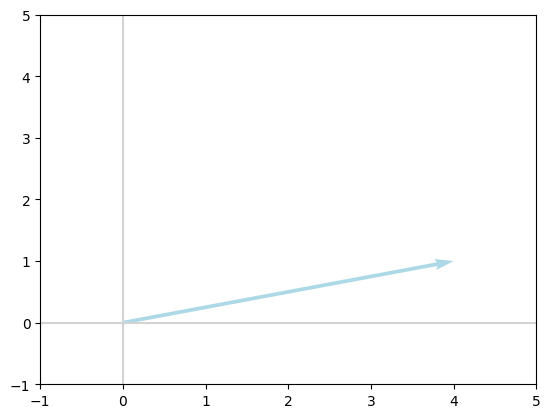

In [ ]:
v = np.array([4, 1])  # 벡터 v를 numpy 배열로 생성
plot_vectors([v], ['lightblue'])  # plot_vectors 함수를 사용하여 벡터 v를 플롯 (색상: 연한 파란색)
plt.xlim(-1, 5)  # x축 범위 설정
_ = plt.ylim(-1, 5)  # y축 범위 설정


### Sum and difference between vectors.

Let $v_1=(4,1), v_2=(1,2)$, the sum $v_3$ of $v_1$ and $v_2$ is $(5,3)$

In [ ]:
v_1=np.array([4,1])
v_2=np.array([1,2])
v_3=v_1+ v_2
v_3

array([5, 3])

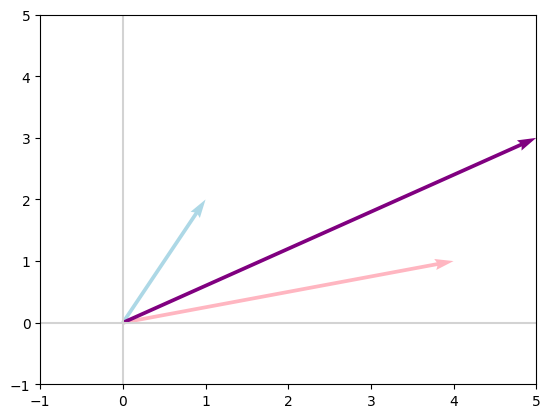

In [ ]:
plot_vectors([v_1, v_2, v_3], ['lightpink', 'lightblue', 'purple'])  # plot_vectors 함수를 사용하여 벡터 v_1, v_2, v_3을 플롯
plt.xlim(-1, 5)  # x축 범위 설정
_ = plt.ylim(-1, 5)  # y축 범위 설정


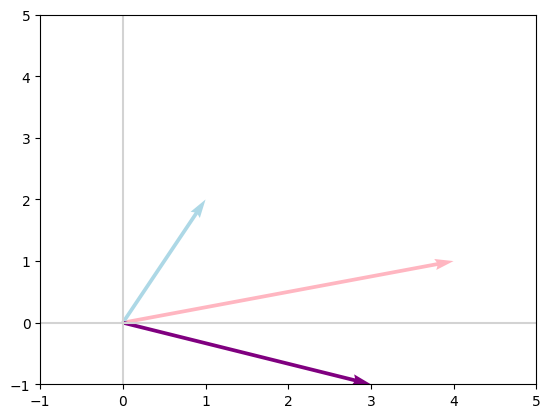

In [ ]:
v_4=v_1-v_2
plot_vectors([v_1,v_2,v_4],['lightpink','lightblue','purple'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

### Distances

- L1 Distance
- L2 Distance
- Cosine distance

In [ ]:
# L1 distance
u=np.array([6,2])
v=np.array([1,5])
u-v

array([ 5, -3])

In [ ]:
L1=np.abs(5)+np.abs(-3) # L1 거리 계산
L1

8

In [ ]:
L2=(5**2 + (-3)**2)**(1/2) # L2 거리 계산
L2

5.830951894845301

In [ ]:
norm_u = (6**2 + 2**2)**(1/2)  # 벡터 u의 유클리드 노름(길이) 계산
norm_v = (1**2 + 5**2)**(1/2)  # 벡터 v의 유클리드 노름(길이) 계산
cos = np.dot(u, v) / (norm_u * norm_v)  # u와 v 사이의 코사인 유사도 계산
cos

0.49613893835683387

## 2. Matrices - 4. Matrix Multiplication


### Frobenius Norm
The Frobenius norm, sometimes also called the Euclidean norm (a term unfortunately also used for the vector L^2-norm), is matrix norm of an m×n matrix A defined as the square root of the sum of the absolute squares of its elements,

$$ ||A||_F=\sqrt{(\sum_{i=1}^m\sum_{j=1}^n|a_{i,j}|^2) }$$

In [ ]:
X = np.array([[1, 2], [3, 4]])
X

array([[1, 2],
       [3, 4]])

In [ ]:
(1**2 + 2**2 + 3**2 + 4**2)**(1/2)

5.477225575051661

In [ ]:
np.linalg.norm(X) # same function as for vector L2 norm

5.477225575051661

### Basic Arithmetical Properties

In [ ]:
X*2 # Element-wise

array([[2, 4],
       [6, 8]])

In [ ]:
X+2

array([[3, 4],
       [5, 6]])

In [ ]:
Y=X+2
Y

array([[3, 4],
       [5, 6]])

In [ ]:
X*Y

array([[ 3,  8],
       [15, 24]])

In [ ]:
## Matrix Multiplication with vector
print("X: ",X)
print('u: ',u)

X:  [[1 2]
 [3 4]]
u:  [6 2]


In [ ]:
np.dot(X, u) # torch.matmul(matrix, vector) in pytorch


array([10, 26])

In [ ]:
## Matrix Multiplication with two Matrices (MxN, NXO)

np.dot(X,Y)

array([[13, 16],
       [29, 36]])

Note that matrix multiplication is not "commutative" (i.e., $AB \neq BA$) so uncommenting the following line will throw a size mismatch error:

### Symmetric Matrices
In linear algebra, a symmetric matrix is a square matrix that is equal to its transpose

In [ ]:
X_sym = np.array([[0, 1, 2], [1, 7, 8], [2, 8, 9]])
X_sym

array([[0, 1, 2],
       [1, 7, 8],
       [2, 8, 9]])

In [ ]:
X_sym.T

array([[0, 1, 2],
       [1, 7, 8],
       [2, 8, 9]])

In [ ]:
X_sym.T == X_sym

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

### Identity Matrices

Identity Matrix is the matrix which is n × n square matrix where the diagonal consist of ones and the other elements are all zeros. It is also called as a Unit Matrix or Elementary matrix. It is represented as In or just by I, where n represents the size of the square matrix.




In [ ]:
I = torch.tensor([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
I

tensor([[1, 0, 0],
        [0, 1, 0],
        [0, 0, 1]])

In [ ]:
x_pt = torch.tensor([25, 2, 5])
x_pt

tensor([25,  2,  5])

In [ ]:
torch.matmul(I, x_pt)

tensor([25,  2,  5])

### Matrix inversion

In [ ]:
X = np.array([[4, 2], [-5, -3]])
X

array([[ 4,  2],
       [-5, -3]])

In [ ]:
Xinv = np.linalg.inv(X)
Xinv

array([[ 1.5,  1. ],
       [-2.5, -2. ]])

As a quick aside, let's prove that  $X^{−1}X=I_n$  as per the slides:

In [ ]:
np.dot(Xinv, X)

array([[1.00000000e+00, 3.33066907e-16],
       [0.00000000e+00, 1.00000000e+00]])

Show that $y = Xw$:

In [ ]:
# Assume
y = np.array([4, -7])
y

array([ 4, -7])

In [ ]:
w = np.dot(Xinv, y)
w

array([-1.,  4.])

In [ ]:
np.dot(X, w)

array([ 4., -7.])

### Orthogonal
Two elements u and v of a vector space with bilinear form B are orthogonal when B(u, v) = 0. Depending on the bilinear form, the vector space may contain nonzero self-orthogonal vectors. In the case of function spaces, families of orthogonal functions are used to form a basis.

In [ ]:
I = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
I

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [ ]:
column_1 = I[:,0]
column_1

array([1, 0, 0])

In [ ]:
column_2 = I[:,1]
column_2

array([0, 1, 0])

In [ ]:
column_3 = I[:,2]
column_3

array([0, 0, 1])

In [ ]:
np.dot(column_1, column_2)

0

In [ ]:
np.dot(column_1, column_3)

0

In [ ]:
np.dot(column_2, column_3)

0

## 5. Linear Transformations


Let's say we have a vector $v$:

In [ ]:
v = np.array([3, 1])
v

array([3, 1])

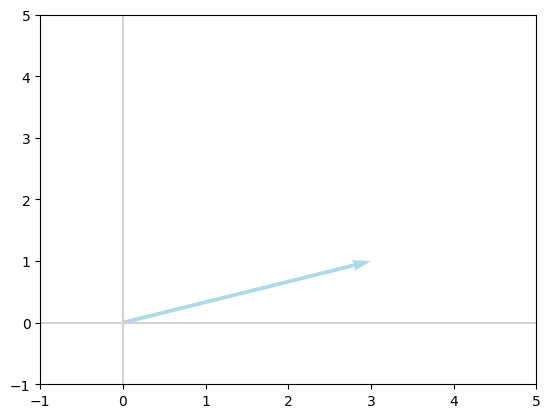

In [ ]:
plot_vectors([v], ['lightblue'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

"Applying" a matrix to a vector (i.e., performing matrix-vector multiplication) can linearly transform the vector, e.g, rotate it or rescale it.

The identity matrix, introduced earlier, is the exception that proves the rule: Applying an identity matrix does not transform the vector:

In [ ]:
I = np.array([[1, 0], [0, 1]])
I

array([[1, 0],
       [0, 1]])

In [ ]:
Iv = np.dot(I, v)
Iv

array([3, 1])

In [ ]:
v == Iv

array([ True,  True])

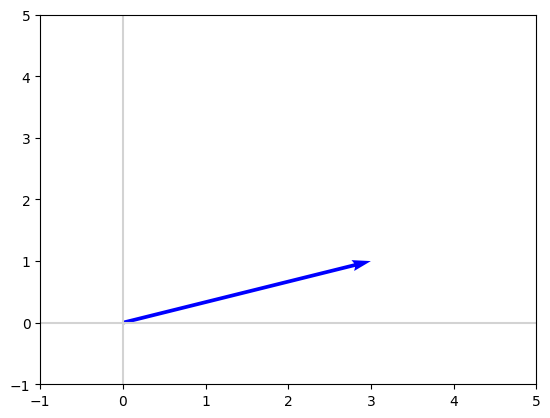

In [ ]:
plot_vectors([Iv], ['blue'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

In contrast, consider this matrix (let's call it $E$) that flips vectors over the $x$-axis:

In [ ]:
E = np.array([[1, 0], [0, -1]])
E

array([[ 1,  0],
       [ 0, -1]])

In [ ]:
Ev = np.dot(E, v)
Ev

array([ 3, -1])

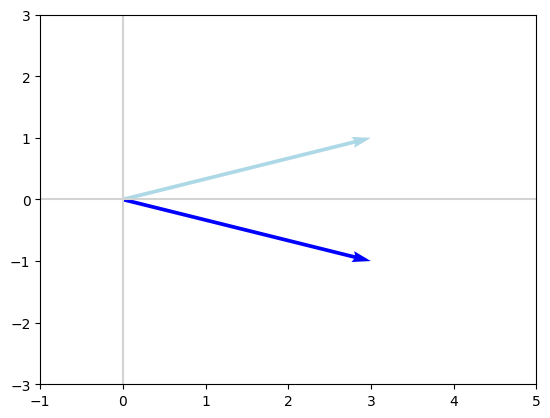

In [ ]:
plot_vectors([v, Ev], ['lightblue', 'blue'])
plt.xlim(-1, 5)
_ = plt.ylim(-3, 3)

Or, this matrix,  F , which flips vectors over the  y -axis:

In [ ]:
F = np.array([[-1, 0], [0, 1]])
F

array([[-1,  0],
       [ 0,  1]])

In [ ]:
Fv = np.dot(F, v)
Fv

array([-3,  1])

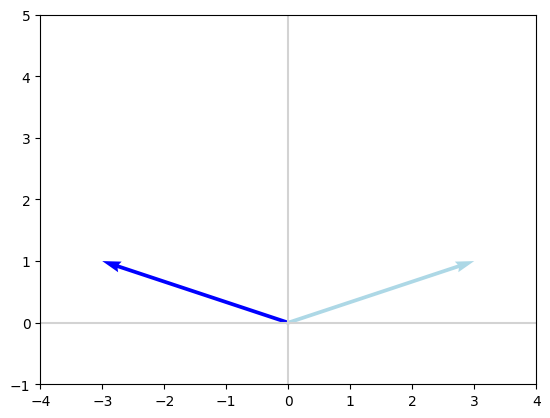

In [ ]:
plot_vectors([v, Fv], ['lightblue', 'blue'])
plt.xlim(-4, 4)
_ = plt.ylim(-1, 5)

Applying a flipping matrix is an example of an **affine transformation**: a change in geometry that may adjust distances or angles between vectors, but preserves parallelism between them.

In addition to flipping a matrix over an axis (a.k.a., *reflection*), other common affine transformations include:
* *Scaling* (changing the length of vectors)
* *Shearing* (example of this on the Mona Lisa coming up shortly)
* *Rotation*

A single matrix can apply multiple affine transforms simultaneously (e.g., flip over an axis and rotate 45 degrees). As an example, let's see what happens when we apply this matrix $A$ to the vector $v$:



In [ ]:
A = np.array([[-1, 4], [2, -2]])
A

array([[-1,  4],
       [ 2, -2]])

In [ ]:
Av = np.dot(A, v)
Av

array([1, 4])

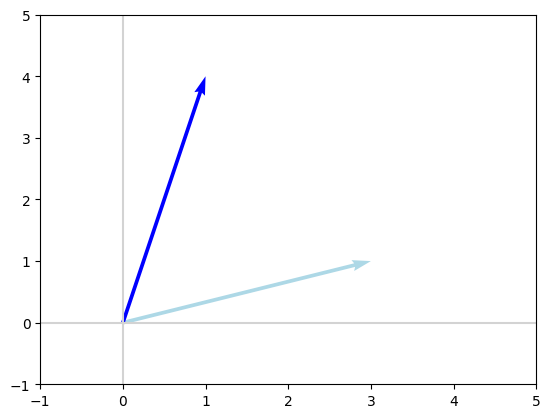

In [ ]:
plot_vectors([v, Av], ['lightblue', 'blue'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

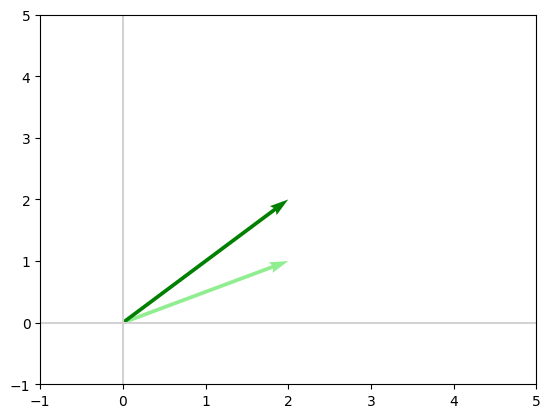

In [ ]:
# Another example of applying A:
v2 = np.array([2, 1])
plot_vectors([v2, np.dot(A, v2)], ['lightgreen', 'green'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

We can concatenate several vectors together into a matrix (say, $V$), where each column is a separate vector. Then, whatever linear transformations we apply to $V$ will be independently applied to each column (vector):

In [ ]:
v

array([3, 1])

In [ ]:
# recall that we need to convert array to 2D to transpose into column, e.g.:
np.matrix(v).T

matrix([[3],
        [1]])

In [ ]:
v3 = np.array([-3, -1]) # mirror image of v over both axes
v4 = np.array([-1, 1])

In [ ]:
V = np.concatenate((np.matrix(v).T,
                    np.matrix(v2).T,
                    np.matrix(v3).T,
                    np.matrix(v4).T),
                   axis=1)
V

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

In [ ]:
IV = np.dot(I, V)
IV

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

In [ ]:
AV = np.dot(A, V)
AV

matrix([[ 1,  2, -1,  5],
        [ 4,  2, -4, -4]])

In [ ]:
# function to convert column of matrix to 1D vector:
def vectorfy(mtrx, clmn):
    return np.array(mtrx[:,clmn]).reshape(-1)

In [ ]:
vectorfy(V, 0)

array([3, 1])

In [ ]:
vectorfy(V, 0) == v

array([ True,  True])

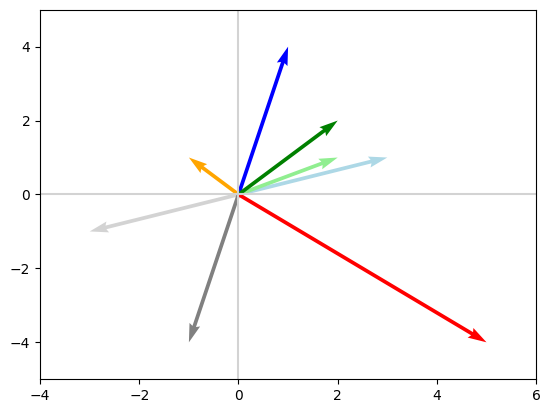

In [ ]:
plot_vectors([vectorfy(V, 0), vectorfy(V, 1), vectorfy(V, 2), vectorfy(V, 3),
             vectorfy(AV, 0), vectorfy(AV, 1), vectorfy(AV, 2), vectorfy(AV, 3)],
            ['lightblue', 'lightgreen', 'lightgray', 'orange',
             'blue', 'green', 'gray', 'red'])
plt.xlim(-4, 6)
_ = plt.ylim(-5, 5)

# Linear Algebra - week4
1. Eigen value, eigen vector
2.Principal Component Analysis


## 1. Eigne value, eigen vector

An  _eigenvector_ of an $n \times n$ matrix $A$ is a nonzero vector $x$ such that $Ax = \lambda x$ for some scalar $\lambda$. A scalar $\lambda$ is called an _eigenvalue_ of $A$ if there is a nontrivial solution $x$ of $Ax = \lambda x$, such an $x$ is called an eigenvector corresponding to $\lambda$.

Rewrite the equation,

$$
(A-\lambda I)x = 0
$$

Since the eigenvector should be a nonzero vector, which means:

1. The column or rows of $(A-\lambda I)$ are linearly dependent
2. $(A-\lambda I)$ is not full rank, $Rank(A)<n$.
3. $(A-\lambda I)$ is not invertible.
4. $\text{det}(A-\lambda I)=0$, which is called _characteristic equation_.


Consider a matrix $A$

$$
A = \begin{bmatrix}
1 & 0 & 0 \\
1 & 0 & 1 \\
2 & -2 & 3
\end{bmatrix}
$$

Set up the characteristic equation,

$$
\text{det}\left(
\begin{bmatrix}
1 & 0 & 0 \\
1 & 0 & 1 \\
2 & -2 & 3
\end{bmatrix}
-
\lambda
\begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}
\right) = 0
$$


Use SymPy ```charpoly``` and ```factor```, we can have straightforward solutions for eigenvalues.


In [ ]:
lamda = sy.symbols('lamda') # 'lamda' withtout 'b' is reserved for SymPy, lambda is reserved for Python

In [ ]:
A = sy.Matrix([[1, 0, 0], [1, 0, 1], [2, -2, 3]])
p = A.charpoly(lamda)  # 행렬 A의 특성 다항식을 lamda에 대해 계산
p  # 특성 다항식 출력

PurePoly(lamda**3 - 4*lamda**2 + 5*lamda - 2, lamda, domain='ZZ')

Factor the polynomial such that we can see the solution.

In [ ]:
sy.factor(p)

PurePoly(lamda**3 - 4*lamda**2 + 5*lamda - 2, lamda, domain='ZZ')

From the factored characteristic polynomial, we get the eigenvalue, and $\lambda =1$ has algebraic multiplicity of $2$, because there are two $(\lambda-1)$. If not factored, we can use ```solve``` instead.

In [ ]:
sy.solve(p, lamda)  # 특성 다항식을 lamda에 대해 풀어서 해를 구함

[1, 2]

Or use ```eigenvals``` directly.

In [ ]:
A.eigenvals()  # 행렬 A의 고유값 계산
# 결과 {1: 2, 2: 1}는 고유값 1이 중복도 2로, 고유값 2가 중복도 1로 나타남을 의미
# 즉, 고유값 1에 대한 고유벡터가 2개, 고유값 2에 대한 고유벡터가 1개 존재

{1: 2, 2: 1}

To find the eigenvector corresponding to $\lambda$, we substitute the eigenvalues back into $(A-\lambda I)x=0$ and solve it. Construct augmented matrix with $\lambda =1$ and perform rref.

In [ ]:
# 행렬 A에서 고유값 1을 뺀 행렬 (A - 1*I)에 대해 오른쪽에 영벡터를 추가하고 행렬을 행 사다리꼴 형태로 변환
(A - 1*sy.eye(3)).row_join(sy.zeros(3, 1)).rref()

(Matrix([
 [1, -1, 1, 0],
 [0,  0, 0, 0],
 [0,  0, 0, 0]]),
 (0,))

The null space is the solution set of the linear system.

$$
\left[
\begin{matrix}
x_1 \\ x_2 \\ x_3
\end{matrix}
\right]=
\left[
\begin{matrix}
x_2-x_3 \\ x_2 \\ x_3
\end{matrix}
\right]=
x_2\left[
\begin{matrix}
1 \\ 1 \\ 0
\end{matrix}
\right]
+x_3\left[
\begin{matrix}
-1 \\ 0 \\ 1
\end{matrix}
\right]
$$

This is called _eigenspace_ for $\lambda = 1$, which is a subspace in $\mathbb{R}^3$. All eigenvectors are inside the eigenspace.

We can proceed with $\lambda = 2$ as well.

In [ ]:
(A - 2*sy.eye(3)).row_join(sy.zeros(3,1)).rref()

(Matrix([
 [1, 0,    0, 0],
 [0, 1, -1/2, 0],
 [0, 0,    0, 0]]),
 (0, 1))

The null space is the solution set of the linear system.

$$
\left[
\begin{matrix}
x_1 \\ x_2 \\ x_3
\end{matrix}
\right]=
\left[
\begin{matrix}
0\\ \frac{1}{2}x_3\\ x_3
\end{matrix}
\right]=
x_3\left[
\begin{matrix}
0 \\ \frac{1}{2} \\ 1
\end{matrix}
\right]
$$

In [ ]:
eig = A.eigenvects()  # 행렬 A의 고유값 및 고유벡터를 계산
eig

[(1,
  2,
  [Matrix([
   [1],
   [1],
   [0]]),
   Matrix([
   [-1],
   [ 0],
   [ 1]])]),
 (2,
  1,
  [Matrix([
   [  0],
   [1/2],
   [  1]])])]

In [ ]:
# 첫 번째 고유값, 그 중복도(고유값의 다중도), 그리고 그 고유값에 대응하는 고유공간을 출력
print('Eigenvalue = {0}, Multiplicity = {1}, Eigenspace = {2}'.format(eig[0][0], eig[0][1], eig[0][2]))

Eigenvalue = 1, Multiplicity = 2, Eigenspace = [Matrix([
[1],
[1],
[0]]), Matrix([
[-1],
[ 0],
[ 1]])]


In [ ]:
print('Eigenvalue = {0}, Multiplicity = {1}, Eigenspace = {2}'.format(eig[1][0], eig[1][1], eig[1][2]))

Eigenvalue = 2, Multiplicity = 1, Eigenspace = [Matrix([
[  0],
[1/2],
[  1]])]


## <font face="gotham" color="purple"> NumPy Functions for Eigenvalues and Eigenspace

In [ ]:
A = np.array(A).astype(float); A

array([[ 1.,  0.,  0.],
       [ 1.,  0.,  1.],
       [ 2., -2.,  3.]])

In [ ]:
np.linalg.eigvals(A)

array([2., 1., 1.])

In [ ]:
np.linalg.eig(A) #return both eigenvalues and eigenvectors

EigResult(eigenvalues=array([2., 1., 1.]), eigenvectors=array([[ 0.        ,  0.        ,  0.40824829],
       [ 0.4472136 ,  0.70710678, -0.40824829],
       [ 0.89442719,  0.70710678, -0.81649658]]))

## 2. PCA

In [ ]:
from sklearn import datasets
iris = datasets.load_iris() # 붓꽃의 세 가지 품종(setosa, versicolor, virginica)에 대한 측정 데이터셋 로드

특성 수: 4개
- Sepal length (꽃받침 길이) in cm
- Sepal width (꽃받침 너비) in cm
- Petal length (꽃잎 길이) in cm
- Petal width (꽃잎 너비) in cm

레이블 수: 3개 (각 레이블은 하나의 붓꽃 품종을 나타냄)
- Setosa
- Versicolor
- Virginica


In [ ]:
iris.data.shape

(150, 4)

In [ ]:
iris.get("feature_names")

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.data[0:6,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4]])

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)  # 주성분 분석(PCA) 객체를 생성하고, 2개의 주성분으로 차원 축소 설정

In [ ]:
X = pca.fit_transform(iris.data)  # PCA를 사용하여 아이리스 데이터셋을 2차원으로 축소

In [ ]:
X.shape

(150, 2)

In [ ]:
X[0:6,:]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045]])

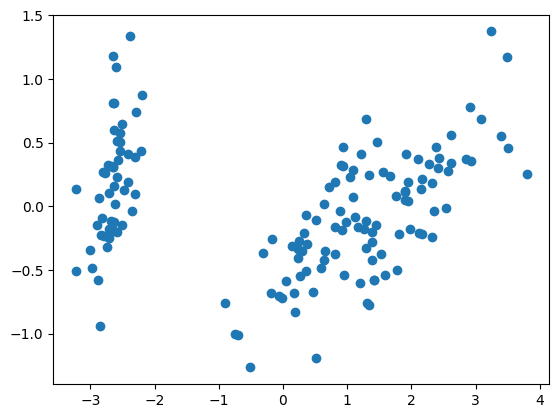

In [ ]:
_ = plt.scatter(X[:, 0], X[:, 1])

In [ ]:
iris.target.shape

(150,)

In [ ]:
iris.target[0:6]

array([0, 0, 0, 0, 0, 0])

In [ ]:
unique_elements, counts_elements = np.unique(iris.target, return_counts=True)
# iris.target 배열에서 고유한 레이블과 각 레이블의 개수를 계산
# unique_elements는 고유한 레이블 값들, counts_elements는 각 레이블의 개수를 반환

np.asarray((unique_elements, counts_elements))
# 고유 레이블과 각 레이블의 개수를 배열 형태로 변환하여 출력


array([[ 0,  1,  2],
       [50, 50, 50]])

In [ ]:
list(iris.target_names)

['setosa', 'versicolor', 'virginica']

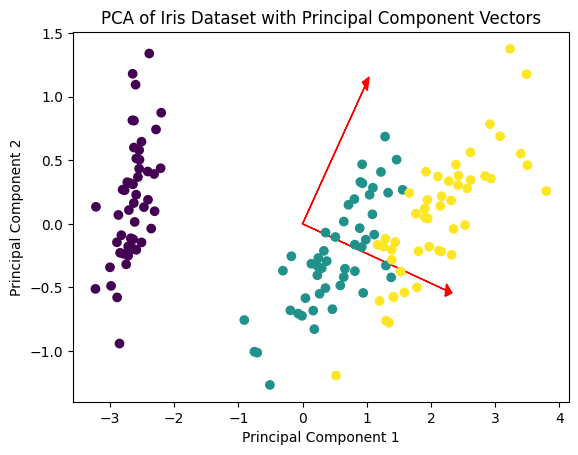

In [ ]:
# 주성분 벡터 표시
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.arrow(0, 0, v[0], v[1], head_width=0.1, head_length=0.1, color='red')
_ = plt.scatter(X[:, 0], X[:, 1], c=iris.target)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset with Principal Component Vectors')
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# PCA를 사용하여 데이터를 3차원으로 축소
pca = PCA(n_components=3)
X = pca.fit_transform(iris.data)
components = pca.components_

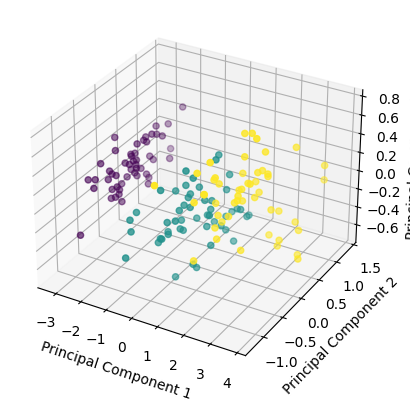

In [ ]:
# 3D 산점도 플롯 생성
fig = plt.figure()  # 새로운 피규어 객체 생성
ax = fig.add_subplot(111, projection='3d')  # 3D 축 추가

# 3D 산점도 그리기
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=iris.target)

# 축 레이블 설정
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.show()